# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values= ["Does not apply"])
df.head(5)


,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df.ABV.str.replace("%", "").head(5)

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

In [9]:
df["ABV"] = df.ABV.str.replace("%", "")

In [10]:
df["ABV"].head()

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [11]:
df["ABV"] = df["ABV"].astype(float)

In [12]:
df["ABV"].head(5)

0    4.5
1    4.9
2    4.8
3    6.0
4    6.0
Name: ABV, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [13]:
df["ABV"].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

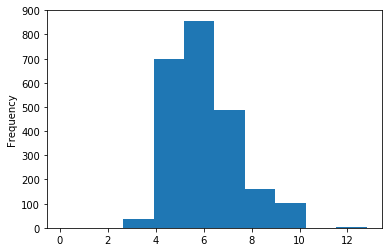

In [14]:
df["ABV"].plot(kind="hist")

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [15]:
df[df.ABV.isnull()].head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN


In [16]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [17]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [18]:
df[df.Location == "Brooklyn, NY"]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [19]:
brooklyn_beer = df[df.Location == "Brooklyn, NY"]
brooklyn_beer.Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [20]:
Sixpoint = brooklyn_beer[brooklyn_beer.Brewery == "Sixpoint Craft Ales"]

In [21]:
Sixpoint.Style.value_counts().head(5)

American IPA       4
Baltic Porter      2
Cream Ale          2
Rye Beer           2
German Pilsener    2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [22]:
df[df.Location.str.contains("NY", na=False)].head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0


### Now *count* all of the breweries in New York state

In [23]:
df.Location.str.contains("NY", na=False).value_counts()

False    2342
True       74
Name: Location, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [24]:
df[df.Style.str.contains(".*IPA", na=False)].head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0


In [25]:
#or
df[df.Style.str.contains(".*IPA", na=False) | df.Style.str.contains("American.*IPA", na=False) | df.Style.str.contains("Imperial.*IPA", na=False)].head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [26]:
df.IBUs.head(17)

0     50.0
1     26.0
2     19.0
3     38.0
4     25.0
5     47.0
6     68.0
7     80.0
8     25.0
9     42.0
10    25.0
11    21.0
12    13.0
13    17.0
14    68.0
15    38.0
16     NaN
Name: IBUs, dtype: float64

In [27]:
df.IBUs.replace("Does not apply", np.nan, inplace=True)

In [28]:
df.IBUs.head(17)

0     50.0
1     26.0
2     19.0
3     38.0
4     25.0
5     47.0
6     68.0
7     80.0
8     25.0
9     42.0
10    25.0
11    21.0
12    13.0
13    17.0
14    68.0
15    38.0
16     NaN
Name: IBUs, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [29]:
df.IBUs.head(17)

0     50.0
1     26.0
2     19.0
3     38.0
4     25.0
5     47.0
6     68.0
7     80.0
8     25.0
9     42.0
10    25.0
11    21.0
12    13.0
13    17.0
14    68.0
15    38.0
16     NaN
Name: IBUs, dtype: float64

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

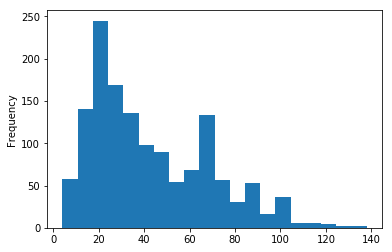

In [30]:
df.IBUs.plot(kind="hist", bins=20)

In [31]:
df.IBUs.hist?

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [32]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [33]:
above_75 = df[df.IBUs > 64]

In [34]:
above_75.Beer.head(5)

6     Citra Ass Down
7     London Balling
14       Rico Sauvin
17      Pile of Face
21        Excess IPL
Name: Beer, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [38]:
below_25 = df[df.IBUs < 21]
below_25.Beer.head(5)

2         Wall's End
12          Sho'nuff
13       Bloody Show
18    The Brown Note
19       House Lager
Name: Beer, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [39]:
df.groupby("Style").IBUs.median().head(5)
median_IBUs = df.groupby("Style").IBUs.median()

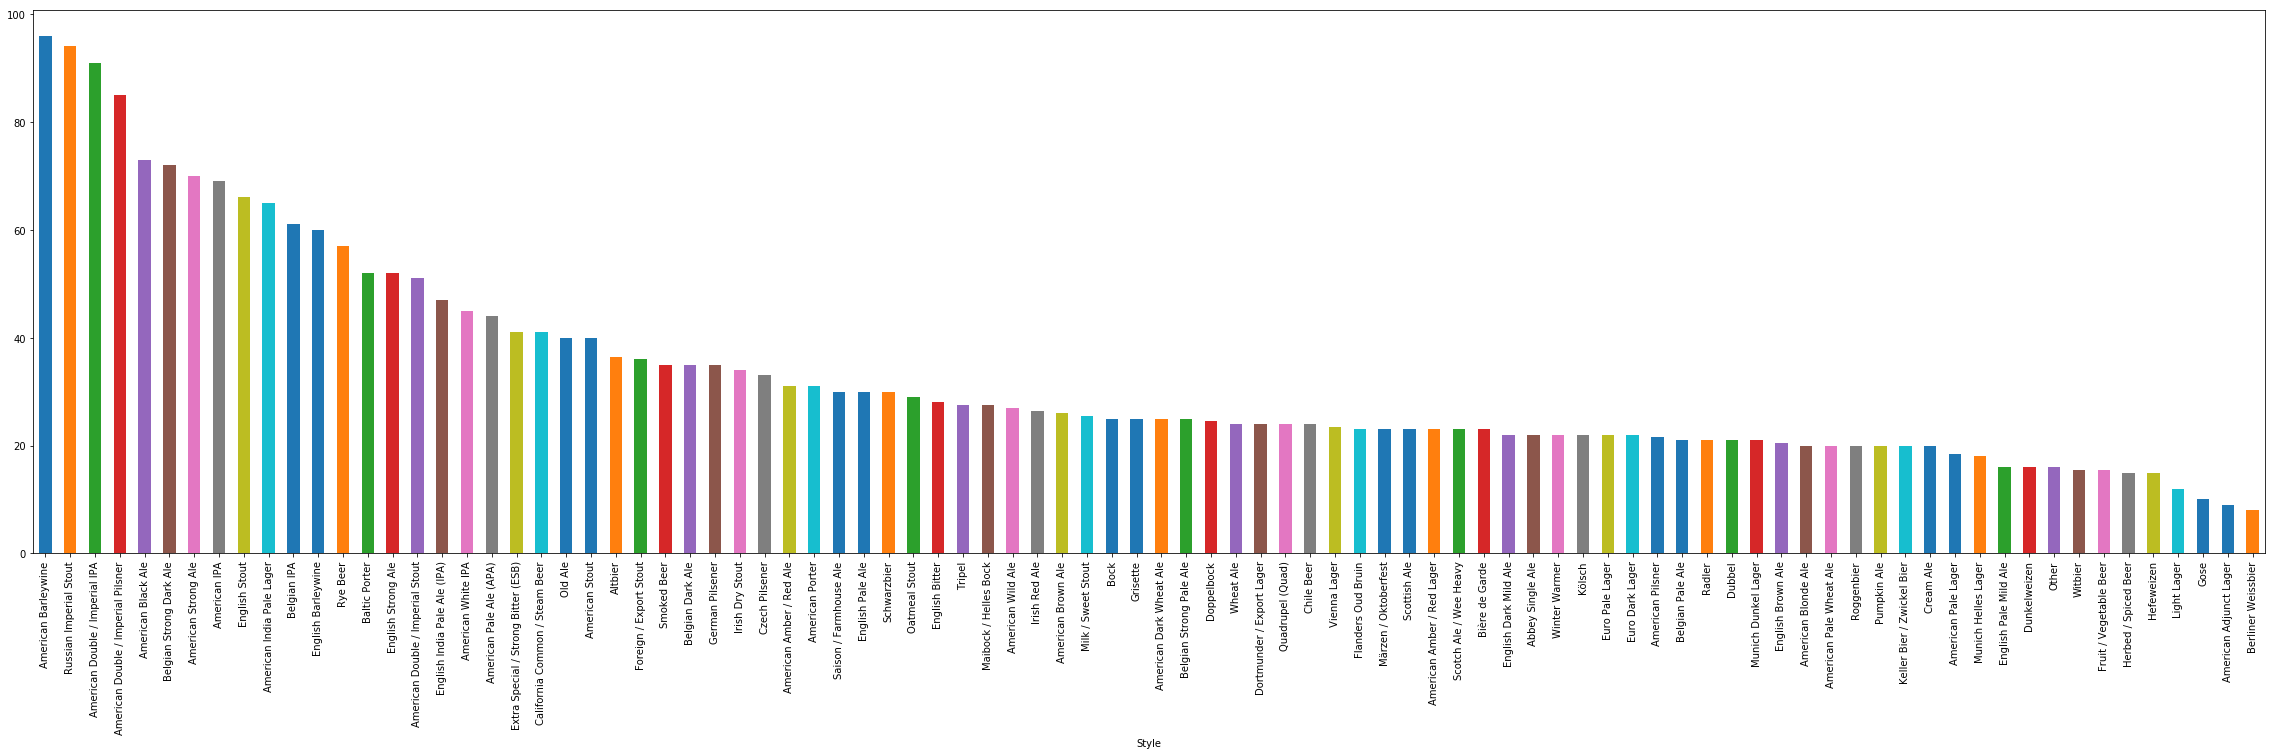

In [40]:
median_IBUs.dropna(how=any).sort_values(ascending=False).plot(kind="bar", figsize=(40,10))
#or median_IBUs.sort_values(ascending=False).plot(kind="bar", figsize=(40,10))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [43]:
highIBUs = above_75.Style.value_counts()
highIBUs.head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [44]:
lowIBUs = below_25.Style.value_counts().head(5)
lowIBUs.head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [46]:
wheat_beers = df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]
wheat_beers.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
42,Whitewater,Great Divide Brewing Company,"Denver, CO",American Pale Wheat Ale,12 oz.,6.1,NaN
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.5,64.0
112,Summer Wheat,Anchor Brewing Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.5,NaN
138,Waterkeeper,SweetWater Brewing Company,"Atlanta, GA",Hefeweizen,12 oz.,5.7,NaN


In [56]:
wheat_beers.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

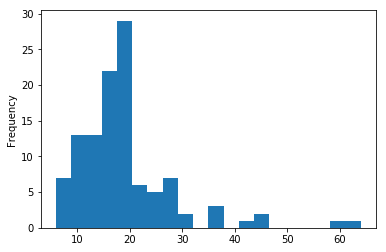

In [48]:
wheat_beers.IBUs.plot(kind="hist", bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

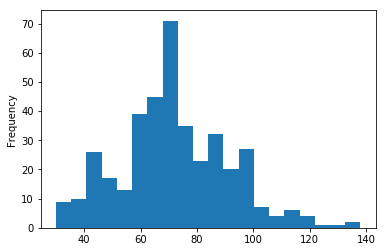

In [51]:
IPAs = df[df.Style.str.contains(".*IPA", na=False)]
IPAs.IBUs.plot(kind="hist", bins=20)

In [57]:
IPAs.IBUs.mean()

71.94897959183673

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

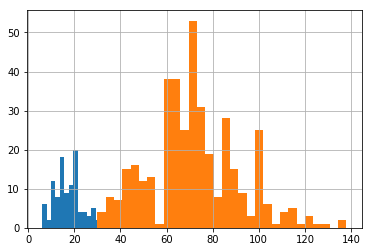

In [59]:
ax = wheat_beers.IBUs.hist(bins=30)
IPAs.IBUs.hist(ax=ax, bins=30)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [60]:
wheat_beers.ABV.mean()

5.043715846994536

In [61]:
IPAs.ABV.mean()

6.879285714285714

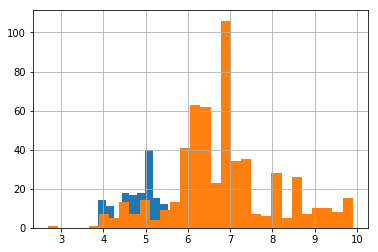

In [63]:
ax = wheat_beers.ABV.hist(bins=30)
IPAs.ABV.hist(ax=ax, bins=30)

## Good work!

If you made it this far you deserve a drink.